# [CPSC 222](https://github.com/GonzagaCPSC222) Intro to Data Science
[Gonzaga University](https://www.gonzaga.edu/)

[Gina Sprint](http://cs.gonzaga.edu/faculty/sprint/)

# Normal Distributions
What are our learning objectives for this lesson?
* Learn about the Z and t distributions
* Compute confidence intervals for a population mean

Content used in this lesson is based upon information in the following sources:
* Dr. Mirjeta Beqiri's Stats notes
* [Math is Fun](https://www.mathsisfun.com/data/standard-normal-distribution.html)
* [JMP Statistical Discovery](https://www.jmp.com/en_us/statistics-knowledge-portal/t-test/t-distribution.html)

## Warm-up Task(s)
1. Open SummaryStats.ipynb

## Today
* Attendance (I need to take in-person attendance)
* Announcements
    * Great job on IQ6, average: 8.97!!
    * DA5 is due ??
* Today
    * StatsFun

## The Normal (Gaussian) Distribution
Here is a great introduction the normal (AKA Gaussian) distribution from [Math is Fun](https://www.mathsisfun.com/data/standard-normal-distribution.html):

![](https://github.com/GonzagaCPSC222/U5-Statistically-Analyzing-Data/raw/master/figures/intro_normal_distribution.png)
    
![](https://github.com/GonzagaCPSC222/U5-Statistically-Analyzing-Data/raw/master/figures/intro_empirical_rule.png)

### Data Science Application: Empirical Rule
The empirical rule for a normal (i.e., Gaussian) data distribution states that"
* About 68% of values are within 1 standard deviation of the mean
* About 95% of values are within 2 standard deviations of the mean
* About 99.7% of values are within 3 standard deviations of the mean

This property of normal distributions is important because if we assume our sample is normal (and alot of data is normal), then we can estimate how likely it is to observe a certain value.

Let's use Numpy to sample some data from a normal distribution to see the empirical rule in action!

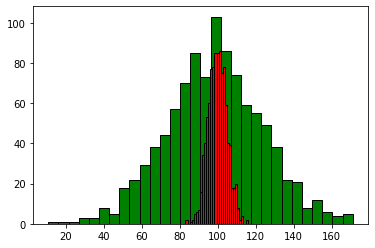

Within +/1 stdev: 68.60%
Within +/2 stdev: 96.20%
Within +/3 stdev: 99.70%


In [34]:
import numpy as np
import matplotlib.pyplot as plt

# consistent values
mean = 100
num_samples = 1000

# large variance, large standard deviation
stdev = 25
large_stdev = np.random.normal(mean, stdev, num_samples) # mean, stdev, num_samples
plt.hist(large_stdev, bins=30, edgecolor="black", facecolor="green")

# small variance, small standard deviation
stdev = 5
small_stdev = np.random.normal(mean, stdev, num_samples) # mean, stdev, num_samples
plt.hist(small_stdev, bins=30, edgecolor="black", facecolor="red")
plt.show()

# test the empirical rule
within_1stdev = 0
within_2stdev = 0
within_3stdev = 0

for value in small_stdev:
    if mean - 1 * stdev <= value <= mean + 1 * stdev:
        within_1stdev += 1
    if mean - 2 * stdev <= value <= mean + 2 * stdev:
        within_2stdev += 1
    if mean - 3 * stdev <= value <= mean + 3 * stdev:
        within_3stdev += 1
print("Within +/1 stdev: %.2f%%" %(within_1stdev / num_samples * 100))
print("Within +/2 stdev: %.2f%%" %(within_2stdev / num_samples * 100))
print("Within +/3 stdev: %.2f%%" %(within_3stdev / num_samples * 100))

## The t-distribution
Here is a great introduction to the t-distribution from [JMP](https://www.jmp.com/en_us/statistics-knowledge-portal/t-test/t-distribution.html)

![](https://github.com/GonzagaCPSC222/U5-Statistically-Analyzing-Data/raw/master/figures/intro_t_distribution.png)

![](https://github.com/GonzagaCPSC222/U5-Statistically-Analyzing-Data/raw/master/figures/intro_t_distribution_graph.png)

## Confidence Intervals
Here is a great introduction to confidence intervals from [Math is Fun](https://www.mathsisfun.com/data/confidence-interval.html):

![](https://github.com/GonzagaCPSC222/U5-Statistically-Analyzing-Data/raw/master/figures/intro_confidence_interval.png)

![](https://github.com/GonzagaCPSC222/U5-Statistically-Analyzing-Data/raw/master/figures/calculating_confidence_interval.png)

Notice how the instructions above for calculating a confidence interval for a population mean using the Z distribution? This is appropriate if you have the population standard deviation, or if you have the sample standard deviation and your sample size (n) is at least 30 observations. If you have less than 30 observations, you can use the t-distribution instead. Here are the confidence interval formulas for both cases:
* Population standard deviation or sample standard deviation w/30+ samples (use Z-value): $\overline{X} \pm Z \frac{s}{\sqrt{n}}$
* Population standard deviation or sample standard deviation w/30+ samples (use t-value): $\overline{X} \pm t \frac{s}{\sqrt{n}}$

To find the t-value associated with your margin of error, use the following t-table:
![](https://media.cheggcdn.com/media/cb1/s675x1024/cb100490-5be7-4807-8972-c0d984f9e9fc/php3o1s6N.png)
(image from https://media.cheggcdn.com/media/cb1/s675x1024/cb100490-5be7-4807-8972-c0d984f9e9fc/php3o1s6N.png)

To use this table, you will need to compute the degrees of freedom (df = n - 1, where n is the number of observations in the sample) and the level of confidence for the confidence interval (e.g. see the small Z-table used in the example problem above).

### Confidence Interval Example w/t-distribution
Example (from [lumenlearning.com](https://courses.lumenlearning.com/introstats1/chapter/a-single-population-mean-using-the-student-t-distribution/)): 
>You do a study of hypnotherapy to determine how effective it is in increasing the number of hourse of sleep subjects get each night. You measure hours of sleep for 12 subjects with the following results. Construct a 95% confidence interval for the mean number of hours slept for the population (assumed normal) from which you took the data.
8.2; 9.1; 7.7; 8.6; 6.9; 11.2; 10.1; 9.9; 8.9; 9.2; 7.5; 10.5

First, identify your variables from the prompt and compute your t-value from the table (we want to use the t-distribution because we do not have the population mean and because we have a small sample size):

In [1]:
import numpy as np

x = [8.2, 9.1, 7.7, 8.6, 6.9, 11.2, 10.1, 9.9, 8.9, 9.2, 7.5, 10.5]
Xbar = np.mean(x)
s = np.std(x, ddof=1) # to compute sample stdev, default is population
n = len(x)
df = n - 1
print("Xbar:", Xbar, "s:", s, "n:", n, "df:", df)

Xbar: 8.983333333333333 s: 1.2904074996494381 n: 12 df: 11


Next, use the t-table to look up your t-value (df = 11, 95% confidence interval):

In [2]:
t = 2.201 # from t-distribution table (use df and 95% CI)
print("t:", t)

t: 2.201


Then, compute your margin of error (what comes after the $\pm$ term) to create your confidence interval:

In [44]:
margin_of_error = t * s / np.sqrt(n)
confidence_interval = (Xbar - margin_of_error, Xbar + margin_of_error)
print("confidence interval:", confidence_interval)

confidence interval: (8.163441995759083, 9.803224670907582)


This means that with 95% confidence, the population mean for this sample of data is within (8.16, 9.80).

Lastly, I'll note that the examples in this lesson all computed a confidence interval for a population mean. You can create confidence intervals for other parameters as well!! In this class, we are going to just scratch the surface of what can be done with normal distributions by constructing confidence intervals for the mean and conducting hypothesis testing using mean(s). That's our next topic!!